In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
plt.style.use('default')

In [2]:
dfl = pd.read_csv('../files/land.csv')

dfup = pd.read_csv('../files/usafacts_pop.csv')
dfuc = pd.read_csv('../files/usafacts_cases2.csv')

dfup.rename(columns={'countyFIPS':'fips'}, inplace=True)


dfuc.rename(columns={'countyFIPS':'fips'}, inplace=True)

# dfuc = dfuc.iloc[:,[0,86]]

unique = dfuc.fips.unique()

dfup = dfup.loc[dfup.fips.isin(unique)]

dfl = dfl.loc[dfl.fips.isin(unique)]
dfl = dfl.rename(columns={'LND110210':'land', 'POP060210': 'pop'})

dfuc = dfuc.loc[dfuc.fips != 0]
dfup = dfup.loc[dfup.fips != 0]

dfuc = dfuc.sort_values(by='fips')
dfup = dfup.sort_values(by='fips')
dfuc = dfuc.reset_index(drop=True)
dfup = dfup.reset_index(drop=True)

dfuc = dfuc.drop([0], axis=0)
dfuc = dfuc.reset_index(drop=True)

dfuc = dfuc.drop(columns=['stateFIPS'])

dfu = pd.concat([dfup, dfuc.drop(columns=['fips', 'State', 'County Name'])], axis=1)

dfl = dfl.drop([0], axis=0)
dfl = dfl.reset_index(drop=True)

unique2 = dfl.fips.unique()

dfu = dfu.loc[dfu.fips.isin(unique2)]

dfu = dfu.reset_index(drop=True)

df = pd.concat([dfl, dfu.drop(columns='fips')], axis=1)

df = df.rename(columns={'State':'St'})

df = df.drop(columns='pop')  # drop the 2010 census population density



In [3]:
df_last = df.columns[-1]

In [4]:
df[df_last]

0       104
1       243
2        74
3        46
4        45
       ... 
3139     14
3140     68
3141      7
3142      5
3143      0
Name: 5/14/20, Length: 3144, dtype: int64

In [5]:
df = pd.concat([df.iloc[:,:5], df[df_last]], axis=1)

df.columns

df = df.rename(columns={'County Name': 'County', 'population':'Population', df_last: 'Cases'})

df['Density'] = df.Population / df.land

df['Cpc'] = 100_000 * df.Cases / df.Population

In [6]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

### Word embeddings?

In [8]:
ef = pd.read_csv ('../files/glove.6B/glove.6B.50d.csv', header=None, delimiter=' ')

In [9]:
def get_array(string):
    return ef.loc[ef[0] == string].iloc[:,1:].to_numpy().reshape(50)


def similarity(string1, string2):
    a = get_array(string1)
    b = get_array(string2)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [15]:
similarity('texas', 'alaska'), similarity('texas', 'new-york')

(0.6582061308470721, -0.037045694169106524)

In [18]:
similarity('nyc', 'newyork'), similarity('nyc', 'new-york')

(0.2120068297479007, 0.1383875558472209)

In [64]:
similarity('tx', 'texas'), similarity('tx', 'mi')

(0.4223551958120937, 0.36498529858792544)

In [43]:
stateslower = [state.lower() for state in df.St.unique().tolist()]

In [82]:
failstates = list()
similarities = list()
for st in stateslower:
    try:
        similarities.append(similarity(states[st.upper()].lower(), st))
    except:
        failstates.append(st)

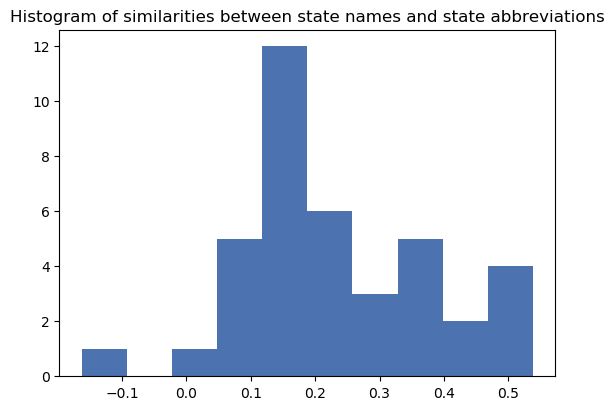

In [212]:
plt.style.use('default')
plt.figure(figsize=(6.4, 4.5))
plt.style.use(np.random.choice(plt.style.available))
plt.hist(similarities)
plt.title('Histogram of similarities between state names and state abbreviations')
plt.show()

### Model

In [7]:
# Select predictor variables
variables = ['St', 'Population', 'Density']
X = df[variables]

# Select target
y = df.Cpc

In [8]:
df.fips

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3137    56037
3138    56039
3139    56041
3140    56043
3141    56045
Name: fips, Length: 3142, dtype: int64

In [11]:
dfc = pd.read_csv('../files/census/cc-est2010-alldata.csv', encoding='ISO-8859-1')

In [12]:
# Get 2010 data
dfc = dfc.loc[dfc.YEAR == 12]

In [13]:
pd.DataFrame(dfc[:50].groupby(['COUNTY', 'AGEGRP']).TOT_POP.sum()).reset_index(inplace=True)

### Datacommons?

In [7]:
# Import Data Commons
import datacommons as dc

# Import other required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

import json

In [8]:
# The key is stored in a secret file. To use this notebook, you will need to 
# make a copy and point this line to the file containing the key in your drive!


# Read the key in and provide it to the Data Commons API
with open('../files/dc.json', 'r') as f:
    secrets = json.load(f)
    dc.set_api_key(secrets['dc_api_key'])

In [9]:
county = pd.DataFrame({'country': ['country/USA']})
state = pd.DataFrame({'country': ['country/USA']})

# Get all states, counties, and cities within the United States
state['state'] = state['country'].map(dc.get_places_in(state['country'], 'State'))
county['county'] = county['country'].map(dc.get_places_in(county['country'], 'County'))

In [10]:
# Unroll the frames
state = state.explode("state").reset_index(drop=True)
county = county.explode("county").reset_index(drop=True)

# Display the first 5 rows of this table.
state.head(5)

,country,state
0,country/USA,geoId/01
1,country/USA,geoId/02
2,country/USA,geoId/04
3,country/USA,geoId/05
4,country/USA,geoId/06


In [11]:
# Get all state, county, and city names
state['state_name'] = state['state'].map(dc.get_property_values(state['state'], 'name'))
county['county_name'] = county['county'].map(dc.get_property_values(county['county'], 'name'))

# Unroll the returned results
state = state.explode('state_name').reset_index(drop=True)
county = county.explode('county_name').reset_index(drop=True)

In [12]:
# Get StatisticalPopulations representing all persons in a given state, county, 
# and city.
state['all_persons_pop'] = state['state'].map(dc.get_populations(state['state'], 'Person'))
county['all_persons_pop'] = county['county'].map(dc.get_populations(county['county'], 'Person'))

# Notice that we don't need to unroll the results because the parameters 
# provided to get_population will always define a unique population if it 
# exists
state.head(5)

,country,state,state_name,all_persons_pop
0,country/USA,geoId/01,Alabama,dc/p/dft95nqhpkkgd
1,country/USA,geoId/02,Alaska,dc/p/th9yyf8ej6m64
2,country/USA,geoId/04,Arizona,dc/p/8hyhwze6s5tn6
3,country/USA,geoId/05,Arkansas,dc/p/rp61n0st0vtr
4,country/USA,geoId/06,California,dc/p/f1jbe2m7w6f58


In [13]:
county['households'] = county['county'].map(dc.get_populations(county['county'], 'Household'))

In [14]:
# Add a 'count' and 'med_age' columns representing the total count and
# median age of populations in all_persons_pop columns we created earlier.
state['count'] = state['all_persons_pop'].map(dc.get_observations(state['all_persons_pop'], 
    'count',
    'measuredValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))
state['med_age'] = state['all_persons_pop'].map(dc.get_observations(state['all_persons_pop'], 
    'age',
    'medianValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))

# Get observations for counties.
county['count'] = county['all_persons_pop'].map(dc.get_observations(county['all_persons_pop'], 
    'count',
    'measuredValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))
county['med_age'] = county['all_persons_pop'].map(dc.get_observations(county['all_persons_pop'], 
    'age',
    'medianValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))

In [15]:
county['income'] = county['households'].map(dc.get_observations(county['households'], 
    'income',
    'medianValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))

In [16]:
# props = {'employment': 'BLS_Employed'}

# dc.get_populations(
#     county['county'], 'Person', constraining_properties=props)

In [17]:
county

,country,county,county_name,all_persons_pop,households,count,med_age,income
0,country/USA,geoId/01001,Autauga County,dc/p/cdkpt4hmxg352,dc/p/6wxe6fbc7rdt9,55036.0,37.8,55317.0
1,country/USA,geoId/01003,Baldwin County,dc/p/2gt2kdl62cgs,dc/p/kkqkjr2xcsrs2,203360.0,42.6,52562.0
2,country/USA,geoId/01005,Barbour County,dc/p/pmfkrdq6rlbqh,dc/p/265x78ezydfxb,26201.0,39.7,33368.0
3,country/USA,geoId/01007,Bibb County,dc/p/tc7wl44bgje52,dc/p/zl1gm62r7yqq2,22580.0,39.8,43404.0
4,country/USA,geoId/01009,Blount County,dc/p/2pvrb99yv8f5,dc/p/wncfkrlxlx8s3,57667.0,40.9,47412.0
...,...,...,...,...,...,...,...,...
3215,country/USA,geoId/72145,Vega Baja Municipio,dc/p/ljyh7j6hfedl4,dc/p/ggnsm9r47n7gb,54754.0,40.1,18900.0
3216,country/USA,geoId/72147,Vieques Municipio,dc/p/hstp5t1kz36zh,dc/p/pe8g17cw00qnf,8931.0,41.4,16261.0
3217,country/USA,geoId/72149,Villalba Municipio,dc/p/g9cbm8gngpzm6,dc/p/c7lgr4rfeqjwf,23659.0,37.6,19893.0
3218,country/USA,geoId/72151,Yabucoa Municipio,dc/p/6zq6sle6wps,dc/p/7x6qgn4n7ejh8,35025.0,41.6,15586.0


In [20]:
county.to_csv('../files/census/dc.csv')

In [125]:
def get_fips(row):
    return int(row.county[6:])

In [127]:
county['fips'] = county.apply(get_fips, axis=1)

In [169]:
df1 = df.set_index('fips').join(county.set_index('fips'))

# Drop Nan
df1 = df1.loc[df1.county == df1.county]  

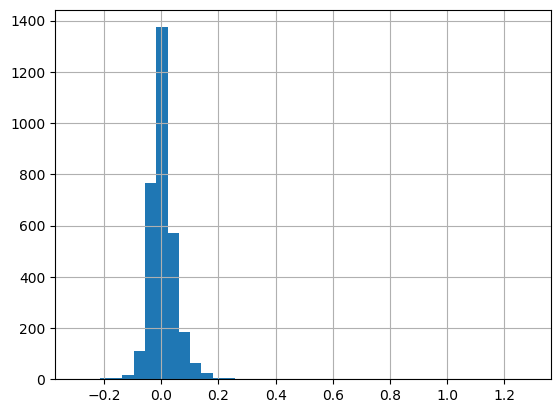

In [176]:
((df1.Population - df1['count']) / (df1['count'])).hist(bins=40)

In [195]:
df1['income'].isnull().any()

False

In [199]:
county.loc[county.county_name == 'New York County']

,country,county,county_name,all_persons_pop,count,med_age,households,income,fips
1858,country/USA,geoId/36061,New York County,dc/p/1fytx744jd4eg,1653880.0,37.1,dc/p/twkrepezp5xw8,79781.0,36061


In [201]:
dc.get_populations('geoId/36061', 'Person', 
                   constraining_properties={'employment': 'BLS_Employed'})

{}

In [207]:
# dc.get_pop_obs('geoId/01001')

In [81]:
pop_obs = Out[75]

In [85]:
print(pop_obs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
county['all_persons_pop'] = county['county'].map(dc.get_populations(county['county'], 'Person'))

<module 'datacommons' from '/Users/jessemurray/opt/anaconda3/lib/python3.7/site-packages/datacommons/__init__.py'>

In [39]:
# Add a 'count' and 'med_age' columns representing the total count and
# median age of populations in all_persons_pop columns we created earlier.

# Get observations for counties.
county['count'] = county['all_persons_pop'].map(dc.get_observations(county['all_persons_pop'], 
    'count',
    'measuredValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))
county['med_age'] = county['all_persons_pop'].map(dc.get_observations(county['all_persons_pop'], 
    'age',
    'medianValue',
    '2017', 
    measurement_method='CensusACS5yrSurvey'))



In [40]:
county_clean = county.dropna().reset_index(drop=True)


In [46]:
def plot_data(title, pd_table):
    """ Generate a scatter plot comparing median age and populationc count. """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel('Median Age in Years')
    plt.ylabel('Population Count (log scale)')

    # Scatter plot the information
    ax = plt.gca()
    ax.set_yscale('log')
    ax.scatter(pd_table['med_age'], pd_table['count'], alpha=0.7)

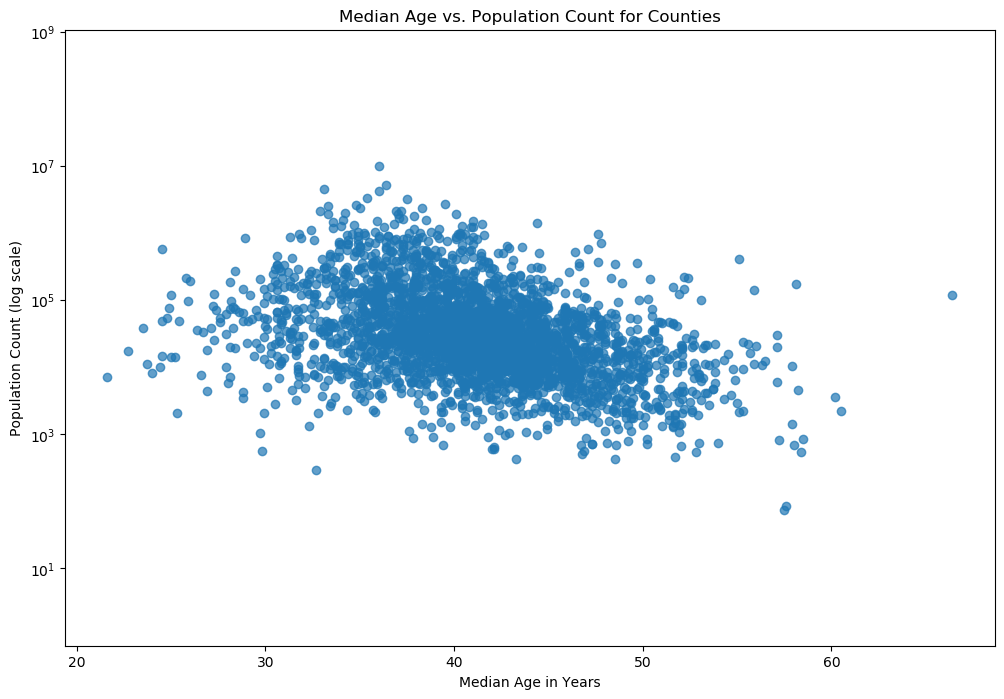

In [48]:
# Generate the plot for county data
plot_data('Median Age vs. Population Count for Counties', county_clean)

In [50]:
county_clean

,country,county,county_name,all_persons_pop,count,med_age
0,country/USA,geoId/01001,Autauga County,dc/p/cdkpt4hmxg352,55036.0,37.8
1,country/USA,geoId/01003,Baldwin County,dc/p/2gt2kdl62cgs,203360.0,42.6
2,country/USA,geoId/01005,Barbour County,dc/p/pmfkrdq6rlbqh,26201.0,39.7
3,country/USA,geoId/01007,Bibb County,dc/p/tc7wl44bgje52,22580.0,39.8
4,country/USA,geoId/01009,Blount County,dc/p/2pvrb99yv8f5,57667.0,40.9
...,...,...,...,...,...,...
3215,country/USA,geoId/72145,Vega Baja Municipio,dc/p/ljyh7j6hfedl4,54754.0,40.1
3216,country/USA,geoId/72147,Vieques Municipio,dc/p/hstp5t1kz36zh,8931.0,41.4
3217,country/USA,geoId/72149,Villalba Municipio,dc/p/g9cbm8gngpzm6,23659.0,37.6
3218,country/USA,geoId/72151,Yabucoa Municipio,dc/p/6zq6sle6wps,35025.0,41.6


In [51]:
df

,fips,land,County,St,Population,Cases,Density,Cpc
0,1001,594.44,Autauga County,AL,55869,104,93.985936,186.149743
1,1003,1589.78,Baldwin County,AL,223234,243,140.418171,108.854386
2,1005,884.88,Barbour County,AL,24686,74,27.897568,299.765049
3,1007,622.58,Bibb County,AL,22394,46,35.969675,205.412164
4,1009,644.78,Blount County,AL,57826,45,89.683303,77.819666
...,...,...,...,...,...,...,...,...
3137,56037,10426.65,Sweetwater County,WY,42343,14,4.061036,33.063316
3138,56039,3995.38,Teton County,WY,23464,68,5.872783,289.805660
3139,56041,2081.26,Uinta County,WY,20226,7,9.718152,34.608919
3140,56043,2238.55,Washakie County,WY,7805,5,3.486632,64.061499
